In [1]:
import pandas as pd
import numpy as np

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
train=pd.read_excel("train-agriculture (2).xlsx")
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
test=pd.read_excel("test-agriculture.xlsx")
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [4]:
test.info(),test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                

(None, None)

In [5]:
train.isna().sum()


ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

# EDA

In [6]:
train.describe()


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [7]:
train[train.Pesticide_Use_Category == 1].Number_Weeks_Used.isna().sum()


5

In [8]:
train[train.Pesticide_Use_Category == 1].Number_Weeks_Used.value_counts()


0.0    40
Name: Number_Weeks_Used, dtype: int64

In [9]:
train[train.Pesticide_Use_Category == 2].Number_Weeks_Used.isna().sum()


301

In [10]:
train[train.Pesticide_Use_Category == 2].Number_Weeks_Used.value_counts()


20.0    187
30.0    152
25.0    129
15.0    108
26.0    107
17.0     93
22.0     92
24.0     91
35.0     90
18.0     86
23.0     85
10.0     81
40.0     81
16.0     77
29.0     76
19.0     75
28.0     74
14.0     71
33.0     70
21.0     67
34.0     67
31.0     66
38.0     66
27.0     64
12.0     60
37.0     58
32.0     56
36.0     56
39.0     46
11.0     37
42.0     36
43.0     35
41.0     33
13.0     33
45.0     30
5.0      28
44.0     28
50.0     26
8.0      21
9.0      20
48.0     20
46.0     19
7.0      19
47.0     18
52.0     13
49.0     13
6.0      11
53.0      7
54.0      6
51.0      6
55.0      5
56.0      4
58.0      3
60.0      1
59.0      1
Name: Number_Weeks_Used, dtype: int64

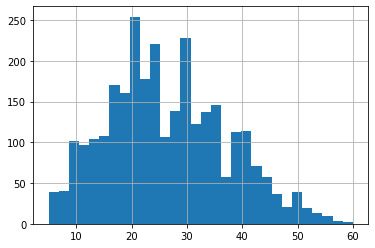

In [11]:
train[train.Pesticide_Use_Category == 2].Number_Weeks_Used.hist(bins=30)


In [12]:
train[train.Pesticide_Use_Category == 3].Number_Weeks_Used.isna().sum()


136

In [13]:
train[train.Pesticide_Use_Category == 3].Number_Weeks_Used.value_counts()


40.0    52
30.0    42
45.0    39
35.0    38
32.0    37
        ..
9.0      4
65.0     3
7.0      3
66.0     3
64.0     1
Name: Number_Weeks_Used, Length: 62, dtype: int64

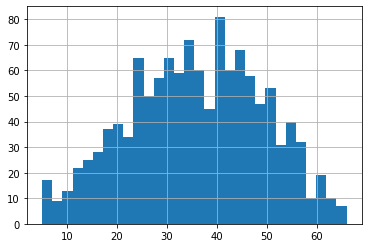

In [14]:
train[train.Pesticide_Use_Category == 3].Number_Weeks_Used.hist(bins=30)


In [15]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))


In [16]:
data = train.loc[:, ["Pesticide_Use_Category", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]]


In [17]:
data.columns


Index(['Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit'],
      dtype='object')

In [18]:
data[data.Pesticide_Use_Category == 2.0].describe()


,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,3205.0,3205.000000,3205.000000,3205.000000
mean,2.0,27.283931,26.264275,13.209360
std,0.0,15.557489,10.280479,9.082445
min,2.0,5.000000,5.000000,0.000000
25%,2.0,20.000000,19.000000,6.000000
50%,2.0,20.000000,25.000000,12.000000
75%,2.0,40.000000,33.000000,19.000000
max,2.0,95.000000,60.000000,47.000000


In [19]:
data[data.Pesticide_Use_Category == 3.0]


,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
24,3,30,26.0,0
25,3,40,20.0,0
26,3,60,15.0,0
27,3,20,14.0,0
28,3,20,15.0,0
...,...,...,...,...
3253,3,20,38.0,0
3254,3,30,50.0,0
3255,3,20,34.0,0
3256,3,20,40.0,0


In [20]:
data[data.Pesticide_Use_Category == 3.0].describe()


,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,1349.0,1349.000000,1349.000000,1349.0
mean,3.0,25.444774,35.836916,0.0
std,0.0,14.859209,12.498134,0.0
min,3.0,5.000000,5.000000,0.0
25%,3.0,15.000000,27.000000,0.0
50%,3.0,20.000000,36.000000,0.0
75%,3.0,35.000000,45.000000,0.0
max,3.0,90.000000,66.000000,0.0


In [21]:
data[data.Pesticide_Use_Category == 1.0].describe()


,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,45.0,45.0,45.0,45.0
mean,1.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0
50%,1.0,0.0,0.0,0.0
75%,1.0,0.0,0.0,0.0
max,1.0,0.0,0.0,0.0


In [22]:
data["Total_Doses_Used"] = data.Number_Doses_Week*data.Number_Weeks_Used


In [23]:
data["Number_Doses_Monthly"] = data.Total_Doses_Used/30.0
data["Number_Doses_Daily"] = data.Total_Doses_Used/360.0
data["Number_Days_Quit"] = data.Number_Weeks_Quit*7.0


In [24]:
data.head()


,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
0,1,0,0.0,0,0.0,0.0,0.0,0.0
1,1,0,0.0,0,0.0,0.0,0.0,0.0
2,1,0,0.0,0,0.0,0.0,0.0,0.0
3,1,0,0.0,0,0.0,0.0,0.0,0.0
4,1,0,0.0,0,0.0,0.0,0.0,0.0


In [25]:
data.describe()


,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,2.283540,26.477495,28.815177,9.205479,781.950424,26.065014,2.172085,64.438356
std,0.471978,15.524647,12.106520,9.713253,581.081023,19.369367,1.614114,67.992772
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,15.000000,20.000000,0.000000,360.000000,12.000000,1.000000,0.000000
50%,2.000000,20.000000,27.000000,7.000000,640.000000,21.333333,1.777778,49.000000
75%,3.000000,40.000000,36.000000,16.000000,1050.000000,35.000000,2.916667,112.000000
max,3.000000,95.000000,66.000000,47.000000,4950.000000,165.000000,13.750000,329.000000


In [26]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))


# data Preprocessing

In [27]:
training_labels = train.iloc[:, -1]
X_train = train.iloc[:, 1:-1]
X_test = test.iloc[:, 1:]


In [28]:
X_train.shape, X_test.shape


((4599, 8), (1199, 8))

In [29]:
data = pd.concat([X_train, X_test])


In [30]:
columns_names_encod = data.columns[[3, 7]]
data = pd.get_dummies(data, columns=columns_names_encod)


In [31]:
data.shape

(5798, 12)

# splitting the dataset

In [32]:
final_train = data[:train.shape[0]]
final_test = data[train.shape[0]:]


In [33]:
final_train.shape, final_test.shape


((4599, 12), (1199, 12))

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

final_train.iloc[:, [0, 3, 4, 5]] = sc.fit_transform(final_train.iloc[:, [0, 3, 4, 5]])


In [35]:
final_test.iloc[:, [0, 3, 4, 5]] = sc.transform(final_test.iloc[:, [0, 3, 4, 5]])


# Creating cross validation set


In [36]:
training_labels.value_counts()


0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_training, X_cv, y_training, y_cv = train_test_split(final_train, training_labels, test_size =0.2, random_state=21)


# Training model on training dataset

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)

clf.fit(X_training, y_training)
y_training_pred = clf.predict(X_training)
y_cv_pred = clf.predict(X_cv)

In [39]:
from sklearn.metrics import accuracy_score
training_accuracy_score = accuracy_score(y_training, y_training_pred)
cv_accuracy_score = accuracy_score(y_cv, y_cv_pred)

print(training_accuracy_score)
print(cv_accuracy_score)


0.8328350095134548
0.8293478260869566


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

param_grid = [{'max_depth': [ 4, 6, 8, 10, 12, 16],
               'min_samples_split': [10, 8, 6, 4, 2],  
             }]

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_training, y_training)

final_model = grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_accuracy_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_accuracy_score, params)

y_cv_pred = final_model.predict(X_cv)


0.8298440073868146 {'max_depth': 4, 'min_samples_split': 10}
0.8298440073868146 {'max_depth': 4, 'min_samples_split': 8}
0.8298440073868146 {'max_depth': 4, 'min_samples_split': 6}
0.8298440073868146 {'max_depth': 4, 'min_samples_split': 4}
0.8298440073868146 {'max_depth': 4, 'min_samples_split': 2}
0.8254958113463919 {'max_depth': 6, 'min_samples_split': 10}
0.8254958113463919 {'max_depth': 6, 'min_samples_split': 8}
0.8252239244513403 {'max_depth': 6, 'min_samples_split': 6}
0.8254958113463919 {'max_depth': 6, 'min_samples_split': 4}
0.8252243676247634 {'max_depth': 6, 'min_samples_split': 2}
0.8119056767413281 {'max_depth': 8, 'min_samples_split': 10}
0.8116342330196996 {'max_depth': 8, 'min_samples_split': 8}
0.8121768988762451 {'max_depth': 8, 'min_samples_split': 6}
0.8113612381910902 {'max_depth': 8, 'min_samples_split': 4}
0.8110893512960384 {'max_depth': 8, 'min_samples_split': 2}
0.8015757474230574 {'max_depth': 10, 'min_samples_split': 10}
0.7988579864060985 {'max_depth': 10

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

param_grid = {'bootstrap': [True],
              'max_depth': [8, 10, 12, 14],
              'min_samples_split': [8, 10, 12, 15],
              'n_estimators': [50, 70, 90, 120],
             }

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_training, y_training)

final_model = grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_accuracy_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_accuracy_score, params)

y_cv_pred = final_model.predict(X_cv)
grid_search.best_params_


0.8325628763373313 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 50}
0.8320197673073624 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 70}
0.8325630979240427 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 90}
0.831203441862073 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 120}
0.833378093849063 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 50}
0.8339216460524549 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 70}
0.8328343200589599 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 90}
0.8341944192943527 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 120}
0.8333794233693324 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 12, 'n_estimators': 50}
0.8336506455042493 {'bootstrap': True, 'max_depth': 8, 'min_samples_split': 12, 'n_estimators': 70}
0.83

{'bootstrap': True,
 'max_depth': 8,
 'min_samples_split': 15,
 'n_estimators': 70}

# Testing dataset model

In [42]:
predictions_test = final_model.predict(final_test)
predictions_test = pd.Series(predictions_test)

frame = {'ID': test.ID, 
         'Crop_Damage': predictions_test}
submission = pd.DataFrame(frame)
